In [ ]:
!pip install opendatasets

Defaulting to user installation because normal site-packages is not writeable


: 

In [1]:
import opendatasets as od
import pandas as pd
import time
from pathlib import Path
import json
from functools import reduce

In [3]:

{"username":"fredbagi","key":"dd3b020a5e6f716a4b2b9bc54cc1aa19"}

{'username': 'fredbagi', 'key': 'dd3b020a5e6f716a4b2b9bc54cc1aa19'}

(7043, 21)


C:\Users\Fred\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [05:25:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Fred\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [05:25:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.82      1033
           1       0.52      0.69      0.59       374

    accuracy                           0.75      1407
   macro avg       0.70      0.73      0.70      1407
weighted avg       0.78      0.75      0.76      1407

Confusion Matrix:
 [[795 238]
 [117 257]]
ROC AUC: 0.8156374404025448


C:\Users\Fred\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [05:25:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Fred\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [05:25:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Fred\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [05:25:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Fred\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [05:25:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:7

Средний ROC AUC: 0.8176302912049174


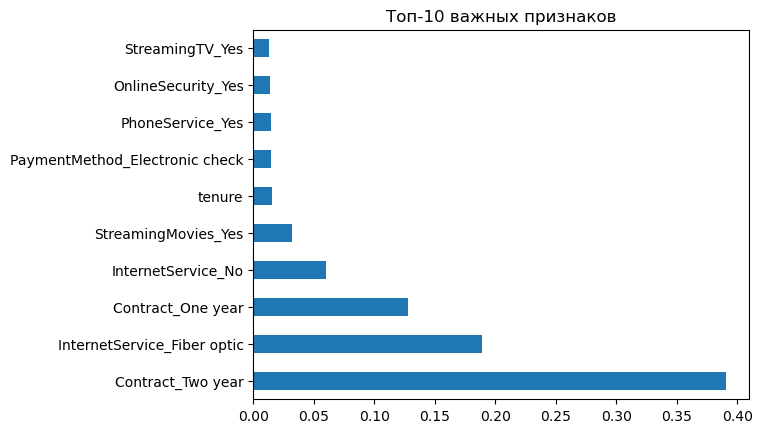

In [5]:
# 1. Импорты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier

# 2. Загрузка данных
df = pd.read_csv("D:\\ANACONDA\\Artificial intelligence\\task03\\WA_Fn-UseC_-Telco-Customer-Churn.csv")  # замените путь при необходимости
print(df.shape)
df.head()

# 3. Очистка данных
df.drop(['customerID'], axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# 4. Преобразование целевой переменной
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 5. Кодирование категориальных признаков
cat_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 6. Разделение признаков и целевой переменной
X = df.drop(columns=['Churn'])
y = df['Churn']

# 7. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 8. Обучение модели
model = XGBClassifier(scale_pos_weight=3, eval_metric='logloss', use_label_encoder=False)
model.fit(X_train, y_train)

# 9. Оценка
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

# 10. Кросс-валидация
scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print("Средний ROC AUC:", scores.mean())

# 11. Важность признаков
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Топ-10 важных признаков")
plt.show()
